In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Transformasi dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
# Load dataset CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

100%|██████████| 170M/170M [00:02<00:00, 66.0MB/s]


In [4]:
# Definisi Model MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return self.softmax(x)

In [5]:
# Inisialisasi Model
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Training Loop
num_epochs = 10
train_acc_list, test_acc_list = [], []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_acc = correct / total
    train_acc_list.append(train_acc)

    # Evaluasi Model
    model.eval()
    correct, total = 0, 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())
    test_acc = correct / total
    test_acc_list.append(test_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch 1/10, Loss: 2.1087, Train Acc: 0.3459, Test Acc: 0.3870
Epoch 2/10, Loss: 2.0623, Train Acc: 0.3938, Test Acc: 0.4063
Epoch 3/10, Loss: 2.0444, Train Acc: 0.4130, Test Acc: 0.4179
Epoch 4/10, Loss: 2.0405, Train Acc: 0.4176, Test Acc: 0.3875
Epoch 5/10, Loss: 2.0278, Train Acc: 0.4307, Test Acc: 0.4281
Epoch 6/10, Loss: 2.0164, Train Acc: 0.4426, Test Acc: 0.4143
Epoch 7/10, Loss: 2.0256, Train Acc: 0.4336, Test Acc: 0.4247
Epoch 8/10, Loss: 2.0168, Train Acc: 0.4428, Test Acc: 0.4364
Epoch 9/10, Loss: 2.0104, Train Acc: 0.4487, Test Acc: 0.4453
Epoch 10/10, Loss: 2.0126, Train Acc: 0.4470, Test Acc: 0.4340


In [7]:
# Evaluasi Akhir
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'MLP Test Accuracy: {accuracy:.4f}')
print(f'MLP Precision: {precision:.4f}')
print(f'MLP Recall: {recall:.4f}')
print(f'MLP F1 Score: {f1:.4f}')

MLP Test Accuracy: 0.4340
MLP Precision: 0.4309
MLP Recall: 0.4340
MLP F1 Score: 0.4126


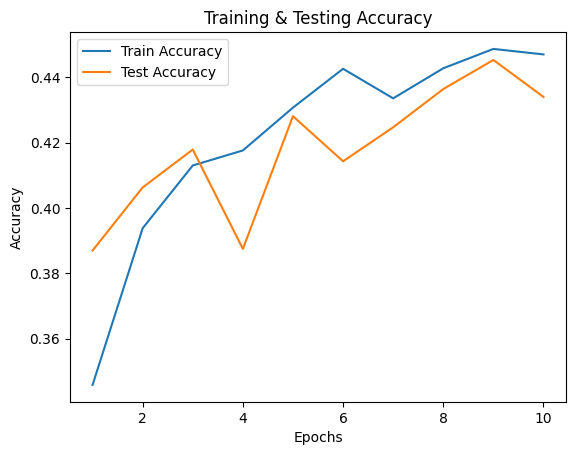

In [8]:
# Plot Akurasi
plt.plot(range(1, num_epochs+1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Testing Accuracy')
plt.show()